In [ ]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import numpy 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../data/Iris.csv')

In [58]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


Análise exploratória dos dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
## Verificando as classes 
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
## Transformando a saída em 0, 1, 2.

le = LabelEncoder()

df['species_encoded'] = le.fit_transform(df['Species'])


"""
Transformando de um jeito mais manual.

for s in range(len(df['Species'])):
    if (df['Species'][s] == 'Iris-setosa'):
        df['Species'][s] = 0
    elif (df['Species'][s] == 'Iris-versicolor'):
        df['Species'][s] = 1
    elif (df['Species'][s] == 'Iris-virginica'):
        df['Species'][s] = 2 
"""

"\nTransformando de um jeito mais manual.\n\nfor s in range(len(df['Species'])):\n    if (df['Species'][s] == 'Iris-setosa'):\n        df['Species'][s] = 0\n    elif (df['Species'][s] == 'Iris-versicolor'):\n        df['Species'][s] = 1\n    elif (df['Species'][s] == 'Iris-virginica'):\n        df['Species'][s] = 2 \n"

In [8]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [9]:
features =  df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [10]:
# Convertendo para numpy array
X = features.values

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
X.shape

(150, 4)

In [17]:
## Convertendo os rótulos

y = df['species_encoded'].values

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
y.shape

(150,)

In [ ]:
## Os dados estão em escalas diferentes, então é preciso fazer
## uma padronização nos dados.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [23]:
## A saída da rede neural possuirá 3 neuronios, então é preciso fazer o 
## processo de OnehotEncoder na coluna y, para a classe passar a ter 3 valores, e não somente 1. 

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
onehot = OneHotEncoder()

In [26]:
y.shape

(150,)

In [27]:
y = y.reshape(-1, 1)
y.shape

(150, 1)

In [28]:
y = onehot.fit_transform(y).toarray()

In [29]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [30]:
y.shape 

(150, 3)

In [31]:
""" A saída ficou assim agora: 

classe 1: 1, 0, 0  # Setosa
classe 2: 0, 1, 0  # Versicolor 
classe 3: 0, 0, 1  # Virgínica

"""

' A saída ficou assim agora: \n\nclasse 1: 1, 0, 0  # Setosa\nclasse 2: 0, 1, 0  # Versicolor \nclasse 3: 0, 0, 1  # Virgínica\n\n'

In [32]:
## Divisão da base de dados

In [33]:
# 70% dos dados para treinamento e 30% para teste.

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3)

In [34]:
X_teste.shape

(45, 4)

Construção da MLP

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
modelo = Sequential()

In [40]:
modelo.add(Dense(8, input_shape=(4,), activation='relu'))  # 1ª camada oculta
modelo.add(Dense(8, activation='relu'))  # 2º camada oculta
modelo.add(Dense(3, activation='softmax'))  # saída com 3 neurônios.

A estrutura da MLP, com 4 neurônios na camada de entrada(que são os 4 atributos), 8 neurônios nas duas camadas ocultas, e 3 neurônios na camada de saída

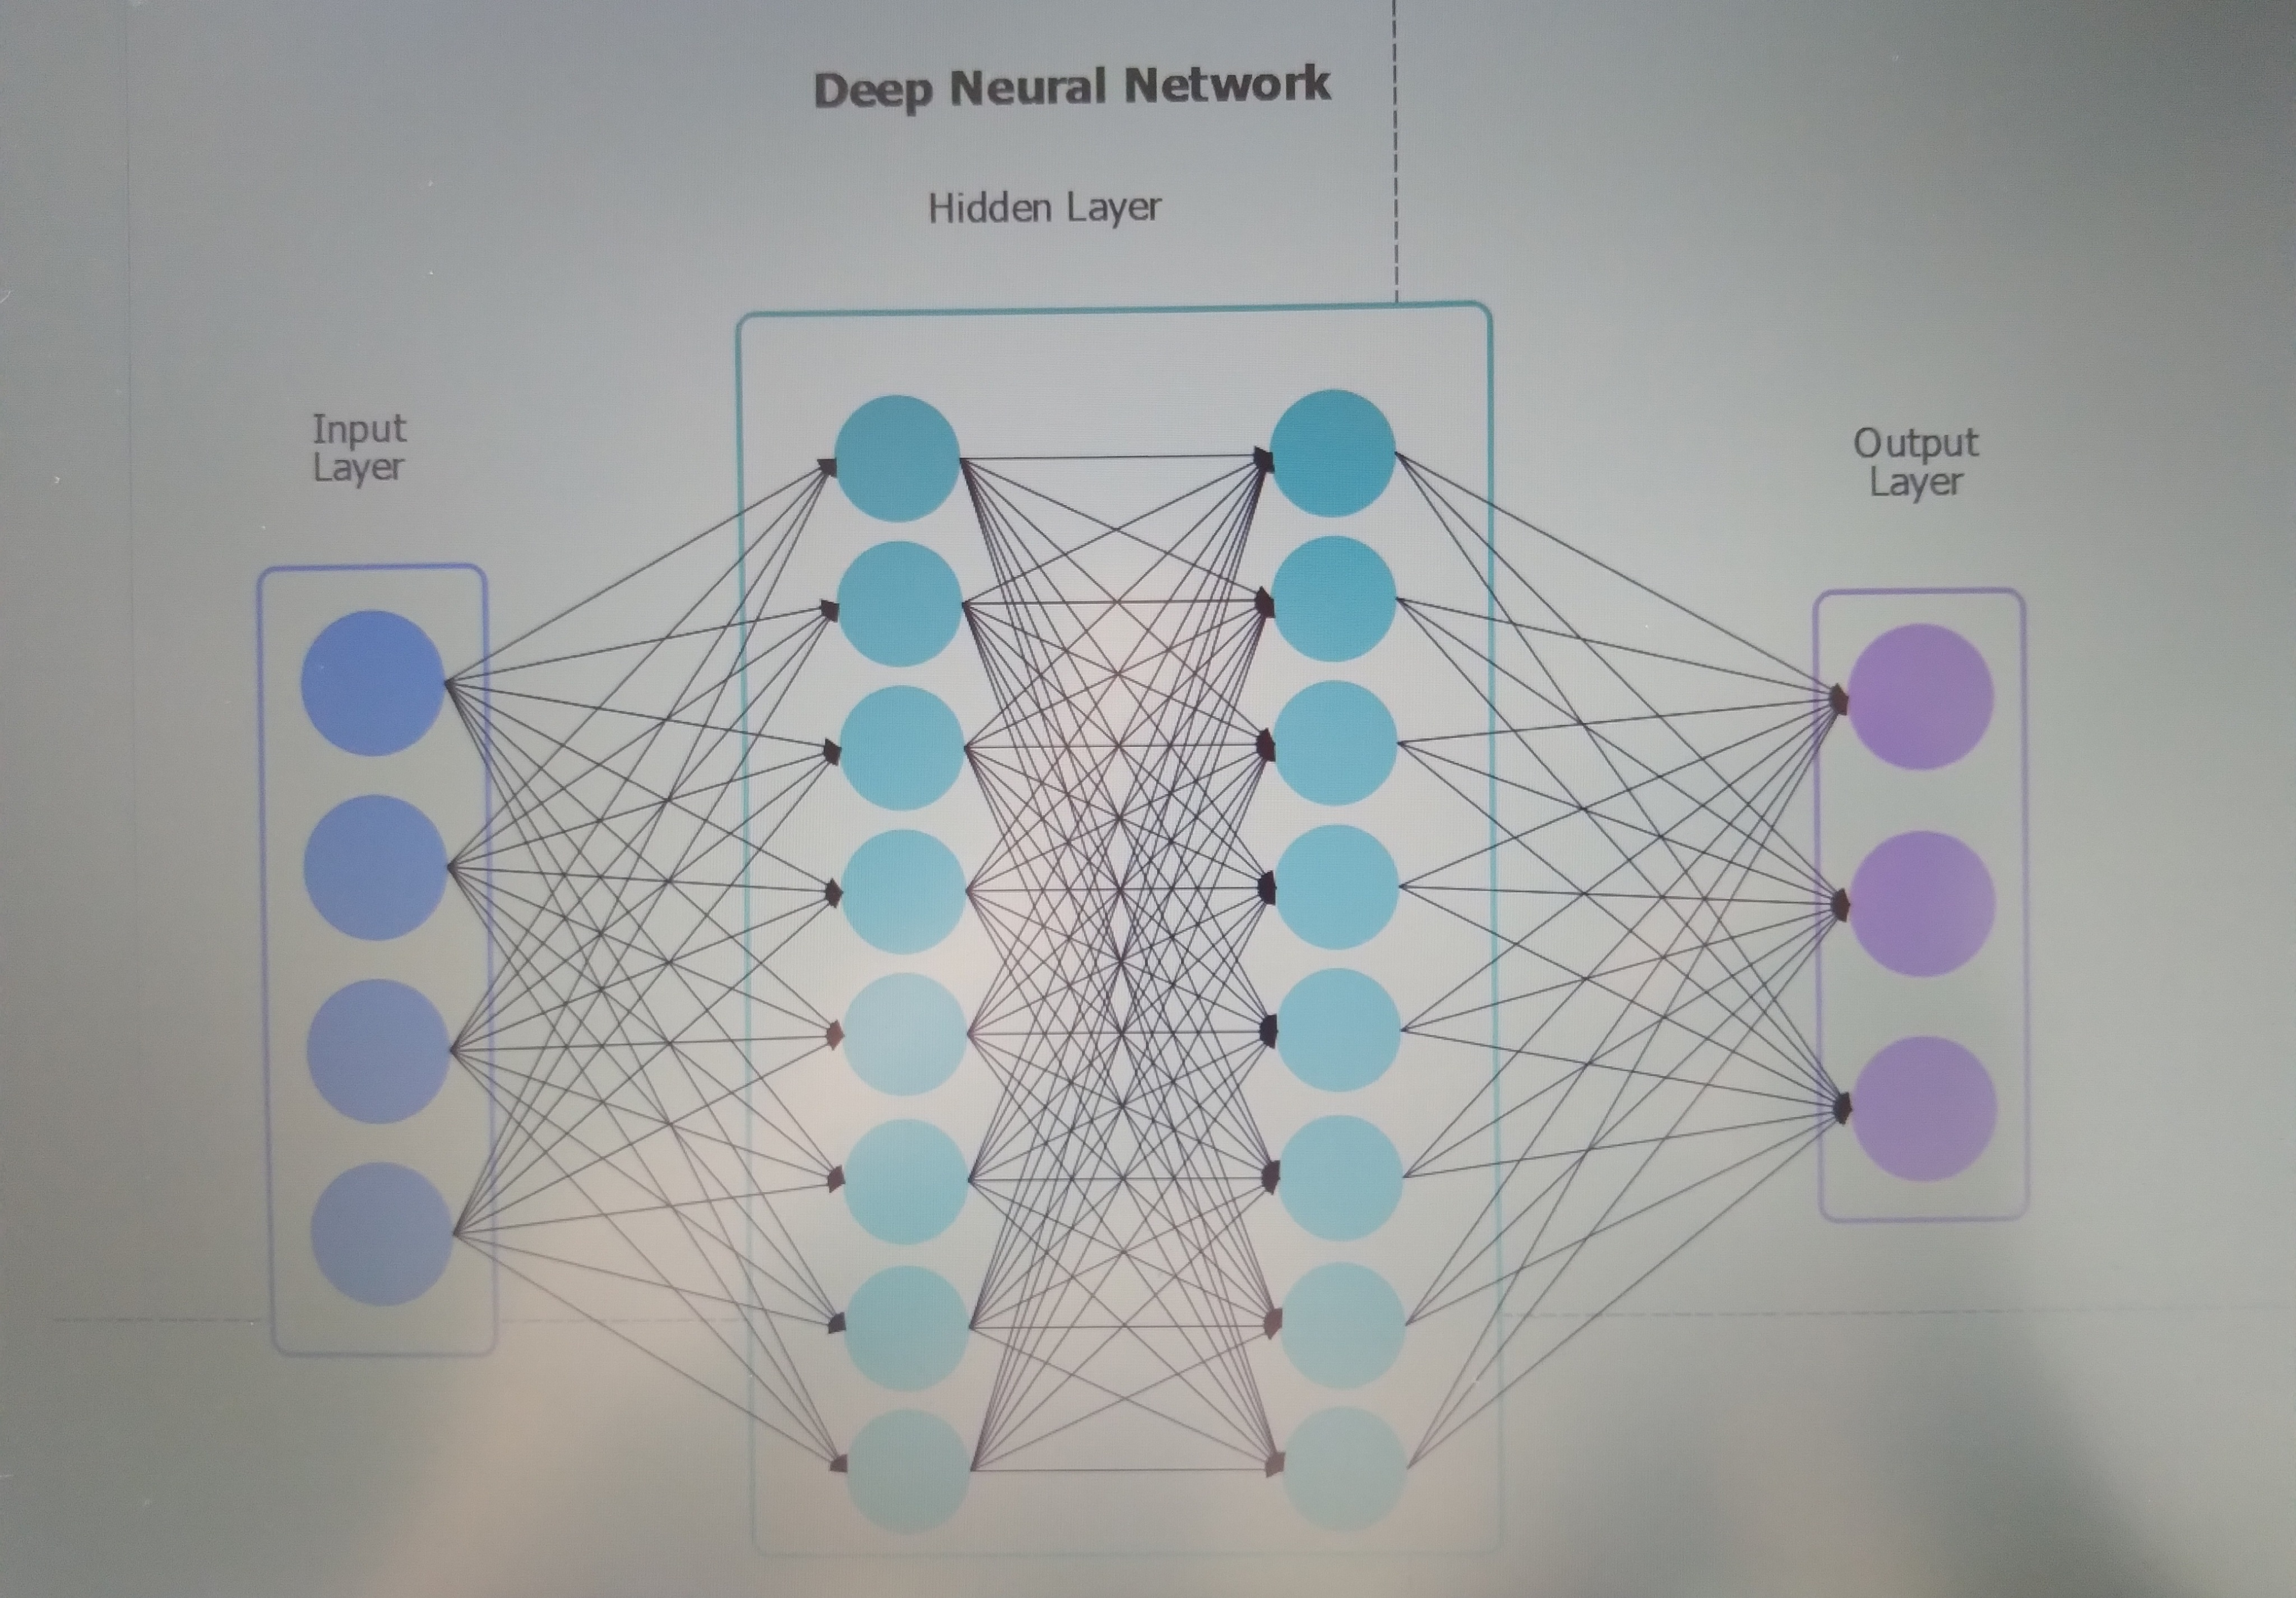

 - Funções de ativação:

- Relu:
    ReLU(x)=max(0,x)

    Se a entrada é negativa, a saída é 0
    Se a entrada é positiva, ela é mantida como está

    x < 0  →  y = 0
    x ≥ 0  →  y = x

- Softmax:
    Para uma saída com n neurônios, a função Softmax transforma os valores em probabilidades.
    
    A soma das saídas será sempre 1
    Cada saída representa a probabilidade de pertencer a uma classe
    Usada na camada de saída para classificação multiclasse

    Exemplo: Saída: [2.0, 1.0, 0.1], ao aplicar a softmax, o resultado é: [0.65, 0.24, 0.11].
             O modelo acha que a 1ª classe tem 65% de chance de ser a correta.

In [41]:
# Compilação do modelo

modelo.compile(optimizer='adam', 
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

""" 
O otimizador é responsável por ajustar os pesos da rede durante o treinamento(backpropagation).
- Adam(Adaptive Moment Estimation) 
    Ele combina duas técnicas populares:
        Momentum: leva em conta o gradiente passado
        RMSProp: adapta a taxa de aprendizado para cada peso
    Ele ajusta a taxa de aprendizado automaticamente e funciona bem para muitos tipos de problemas.

loss: 
  - É a função de perda (erro) usada para medir o quão errado o modelo está a cada iteração. O treinamento tenta minimizar essa perda.
  - Porque categorical_crossentropy?
       Porque o problema é de classificação multiclasse com one-hot encoding
       A categorical_crossentropy compara as probabilidades previstas pelo modelo (ex: [0.8, 0.1, 0.1]) com a verdade real (ex: [1, 0, 0]).

Acurracy:
    Avaliar a performance do modelo.    
       
"""

' \nO otimizador é responsável por ajustar os pesos da rede durante o treinamento(backpropagation).\n- Adam(Adaptive Moment Estimation) \n    Ele combina duas técnicas populares:\n        Momentum: leva em conta o gradiente passado\n        RMSProp: adapta a taxa de aprendizado para cada peso\n    Ele ajusta a taxa de aprendizado automaticamente e funciona bem para muitos tipos de problemas.\n\nloss: \n  - É a função de perda (erro) usada para medir o quão errado o modelo está a cada iteração. O treinamento tenta minimizar essa perda.\n  - Porque categorical_crossentropy?\n       Porque o problema é de classificação multiclasse com one-hot encoding\n       A categorical_crossentropy compara as probabilidades previstas pelo modelo (ex: [0.8, 0.1, 0.1]) com a verdade real (ex: [1, 0, 0]).\n\nAcurracy:\n    Avaliar a performance do modelo.    \n\n'

Treinando o modelo

In [42]:
historico = modelo.fit(X_treinamento, y_treinamento,
            epochs=100,
            batch_size=10,
            validation_data=(X_teste, y_teste),
            verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.3854 - loss: 1.0794 - val_accuracy: 0.3778 - val_loss: 1.0617
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3457 - loss: 1.0811 - val_accuracy: 0.5556 - val_loss: 1.0508
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5632 - loss: 1.0623 - val_accuracy: 0.6889 - val_loss: 1.0378
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6027 - loss: 1.0496 - val_accuracy: 0.6889 - val_loss: 1.0180
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6353 - loss: 1.0310 - val_accuracy: 0.6889 - val_loss: 0.9969
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6683 - loss: 1.0017 - val_accuracy: 0.6889 - val_loss: 0.9719
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6379 - loss: 0.9726 - val_accuracy: 0.6889 - val_loss: 0.9422
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6254 - loss: 0.9627 - val_accuracy: 0.

Avaliando o desempenho

In [44]:
# Avaliação no conjunto de teste.
loss, accuracy = modelo.evaluate(X_teste, y_teste)
print(f'Acurácia no teste: {accuracy:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9347 - loss: 0.2026
Acurácia no teste: 0.93


In [45]:
""" 
A acurácia de treinamento foi 0.98, e a acurácia nos dados de teste foi 0.93.as_integer_ratio
O modelo teve um bom desempenho nos dados de teste, ou seja, ele demonstrou ter uma boa capacidade de 
generalização, isso significa que ele aprendeu os padrões dos dados, e não apenas "memorizou" os dados de 
treinamento, por isso ele conseguiu classificar bem nos dados novos(de teste). Não ocorreu overfitting, o modelo
não ficou sobreajustado.
"""

' \nA acurácia de treinamento foi 0.98, e a acurácia nos dados de teste foi 0.93.as_integer_ratio\nO modelo teve um bom desempenho nos dados de teste, ou seja, ele demonstrou ter uma boa capacidade de \ngeneralização, isso significa que ele aprendeu os padrões dos dados, e não apenas "memorizou" os dados de \ntreinamento, por isso ele conseguiu classificar bem nos dados novos(de teste). Não ocorreu overfitting, o modelo\nnão ficou sobreajustado.\n'

Curva de aprendizado

In [46]:
import matplotlib.pyplot as plt

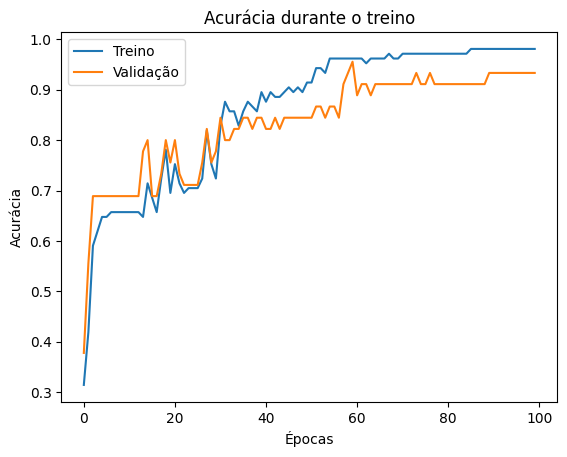

In [47]:
plt.plot(historico.history['accuracy'], label='Treino')
plt.plot(historico.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treino')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

Matriz de confusão e o relatório de classificação

In [54]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
y_pred = modelo.predict(X_teste)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [50]:
# Pegando o índice do maior valor de cada linha (classe com maior probabilidade)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_teste, axis=1)

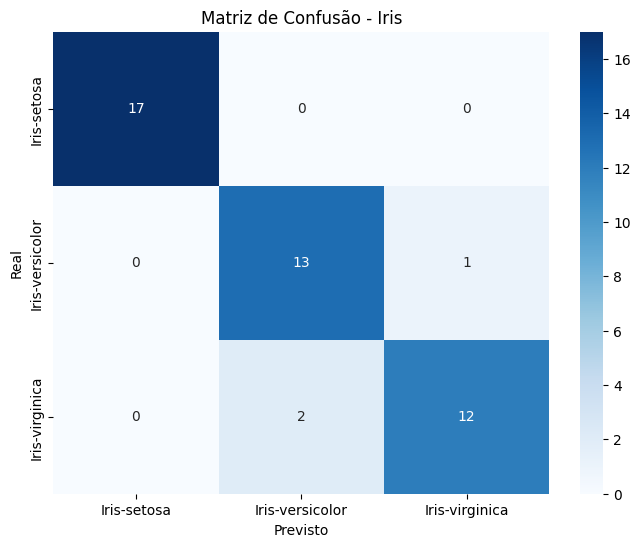

In [56]:
# Matriz de confusão
matriz = confusion_matrix(y_true_classes, y_pred_classes)
#print("Matriz de Confusão:\n", matriz)
# Plotando o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Iris')
plt.show()


In [ ]:
## A diagonal da matriz contém as previsões corretas.
##   Ex: o modelo disse que era setosa e realmente era setosa.

## Fora da diagonal, são os erros do modelo.

In [53]:
# Classification report (precision, recall, f1-score)
relatorio = classification_report(y_true_classes, y_pred_classes, target_names=le.classes_)
print("\nRelatório de Classificação:\n", relatorio)


Relatório de Classificação:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



Interpretando os resultados:



Iris-setosa:
    Precision: 1.00(100%) -> Tudo que foi previsto como setosa estava certo.
    Nenhuma versicolor ou virginica foi classificada erroneamente como setosa.

    Recall: 1.00(100%) -> Todas as amostras reais de setosa foram corretamente identificadas. Nenhuma passou despercebida.

    O modelo nunca erra quando se trata da classe setosa

Iris-versicolor:
     
    Precision: 0.87 (87%) -> Quando o modelo previu "versicolor", 87% das vezes ele acertou.

    Recall: 0.93 (93%) -> Das 14 amostras reais de versicolor, o modelo encontrou 13 corretamente.
    Ele deixou de reconhecer 1 amostra real.

Iris-virginica:
    Precision: 0.92 (92%) -> De todas as previsões para virginica, 92% estavam certas.

    Recall: 0.86 (86%) -> Das 14 amostras reais de virginica, o modelo só acertou 12.
    Ou seja, 2 amostras de virginica não foram reconhecidas corretamente.



